<a href="https://colab.research.google.com/github/tfrbf/Machine_Learning/blob/main/CO2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Preparation ⛏


In [2]:
df = pd.read_csv('/content/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df = df.drop(['TRANSMISSION', 'VEHICLECLASS', 'MODEL', 'MAKE', 'MODELYEAR', 'FUELTYPE'], axis=1)

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_CITY'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_HWY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>, <Axes: >, <Axes: >]],
      dtype=object)

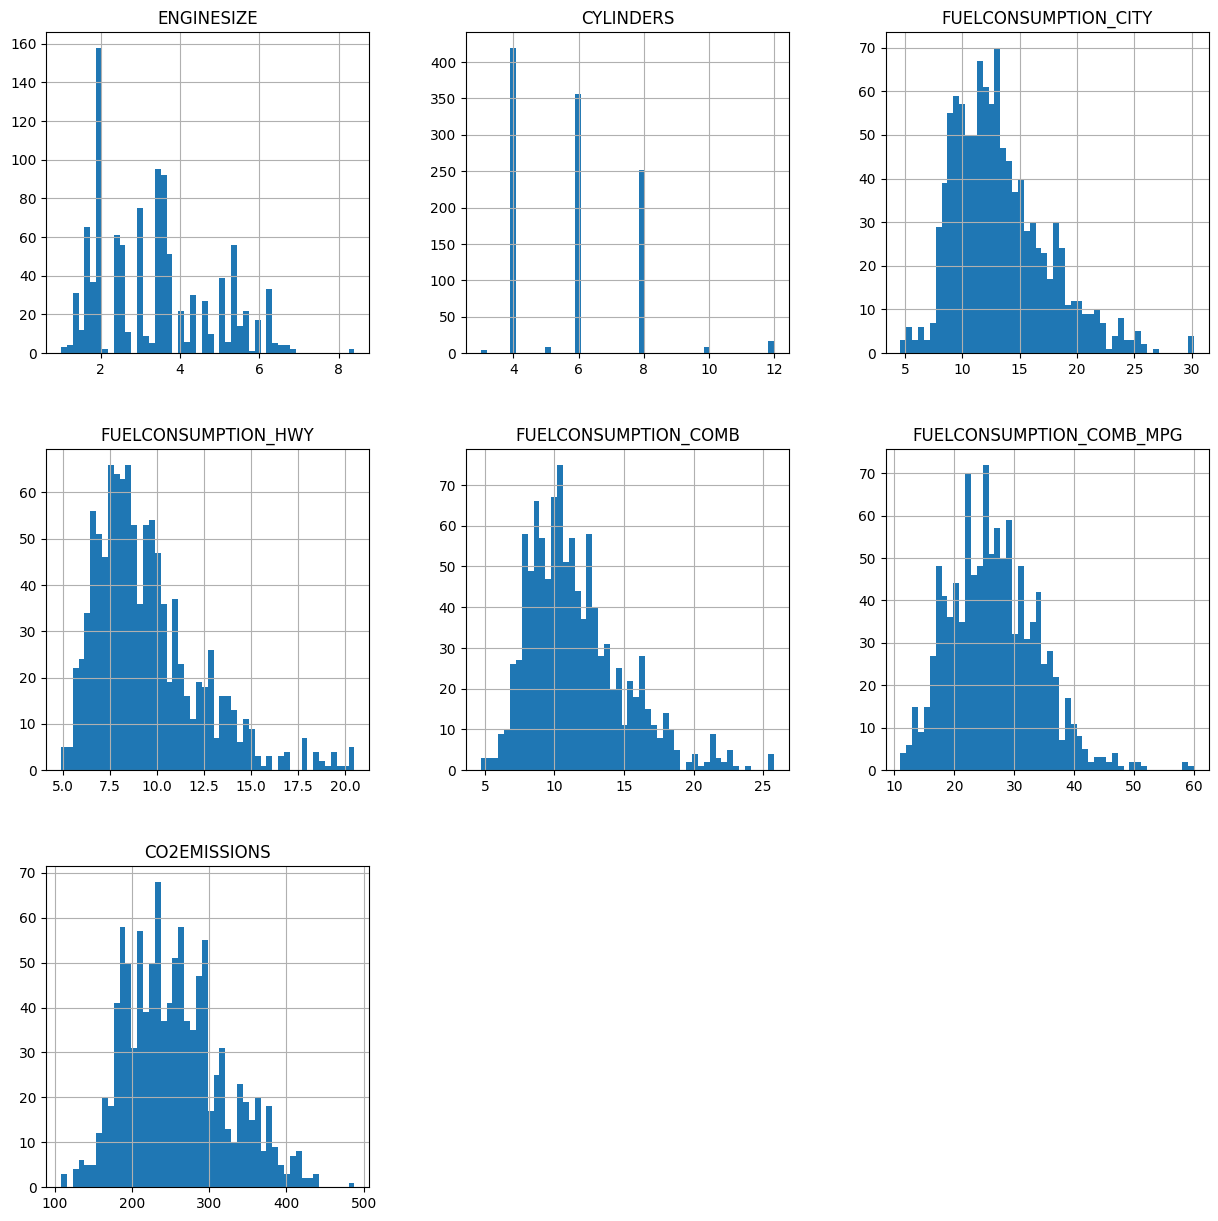

In [8]:
df.hist(bins=50,figsize=(15,15))

In [5]:
corr = df.corr()
corr['CO2EMISSIONS'].sort_values(ascending=False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
Name: CO2EMISSIONS, dtype: float64

array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_CITY'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_HWY'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'FUELCONSUMPTION_COMB_MPG'}>],
       [<Axes: title={'center': 'CO2EMISSIONS'}>, <Axes: >, <Axes: >]],
      dtype=object)

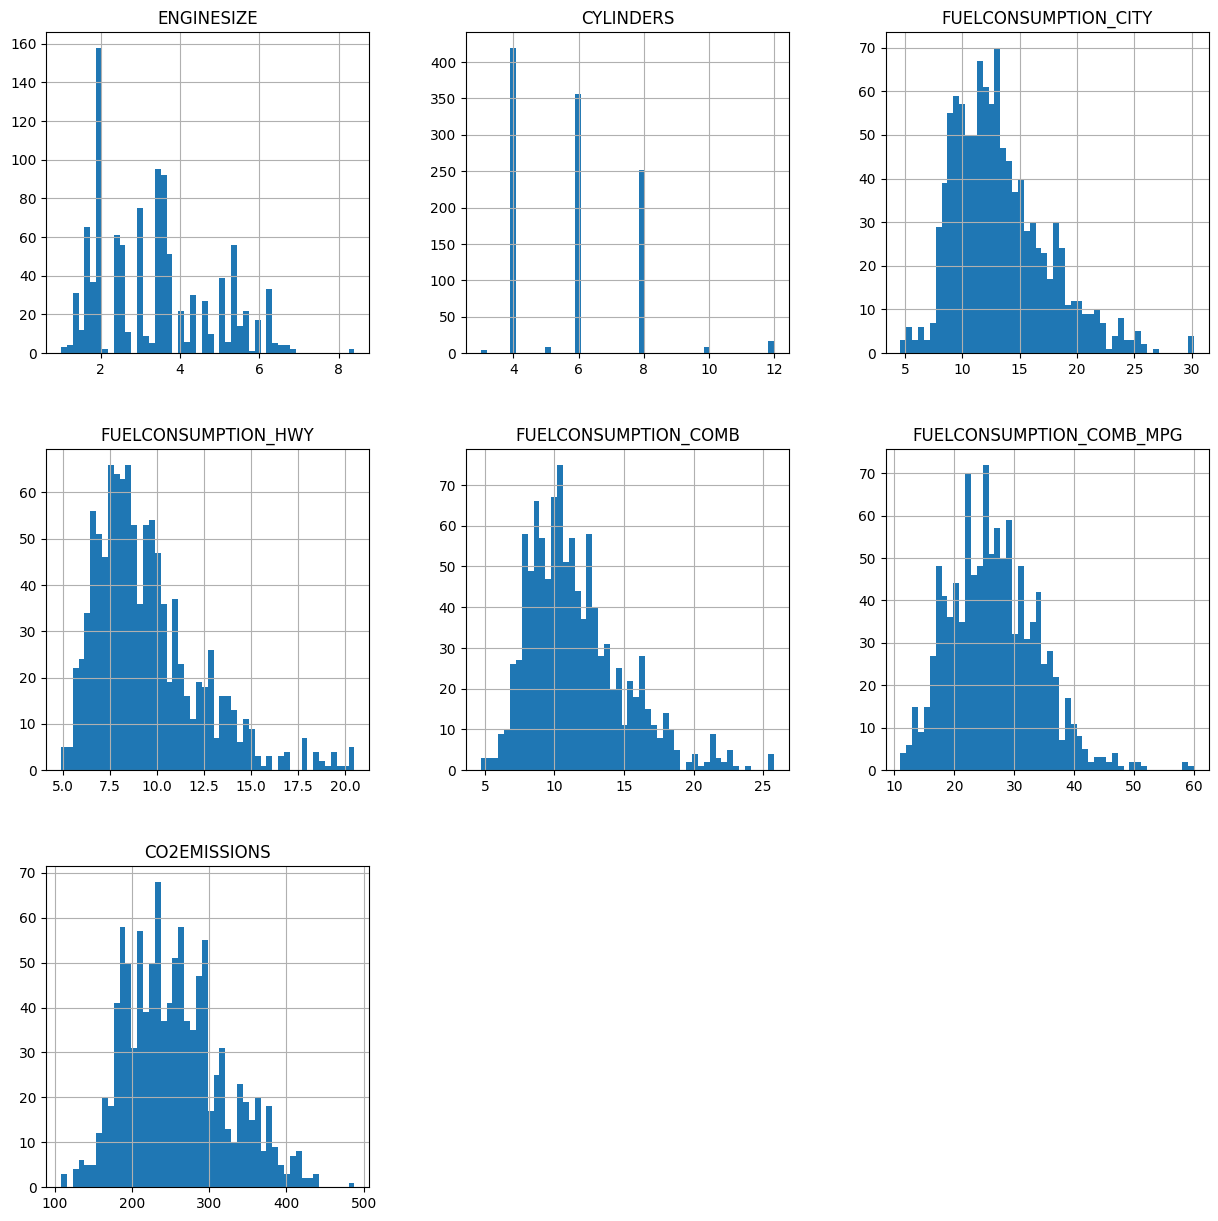

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(df)

df.hist(bins=50,figsize=(15,15))

# Creaing Model

In [10]:
x = df.drop(['CO2EMISSIONS'], axis=1)
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 399.41868891442704
R-squared: 0.9034041224574011


In [11]:
print("Coefficient: ", model.coef_)
print("Coefficient: ", model.intercept_)

Coefficient:  [  8.96115125   7.24023686 -13.00156667  -5.47215573  21.86697334
  -4.03446041]
Coefficient:  262.5721608698736
